<a href="https://colab.research.google.com/github/216d0136/python_practice/blob/master/lesson18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (w

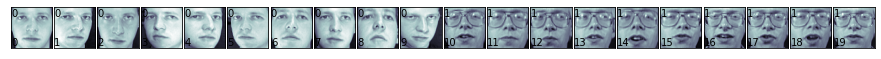

In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
print(faces.DESCR)

print(faces.keys())

# 要素数の確認
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)


def print_faces(images, target, top_n):
    #出力する画像のサイズを設定する
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
    for i in range(top_n):
        p = fig.add_subplot(20, 20,i+1,xticks=[],yticks=[])
        p.imshow(images[i],cmap=plt.cm.bone)

        # 正解ラベルを表示
        p.text(0,14,str(target[i]))
        p.text(0,60,str(i))

print_faces(faces.images, faces.target,20)


from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target,test_size=0.25,random_state=0)


from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

# 交差検定
def evaluate_cross_validation(clf, x, y, K):

    cv = KFold(n_splits=K, random_state=0,shuffle=True)
    scores = cross_val_score(clf,x,y,cv=cv)
    print(scores)
    print ("Mean score: {} (+/-{})".format( np.mean (scores), sem(scores)))

evaluate_cross_validation(svc_1,x_train,y_train,5)


def train_and_evaluate(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)

    print("Accuracy(学習データ):",clf.score(x_train,y_train))
    print("Accuracy(テストデータ):",clf.score(x_test,y_test))

train_and_evaluate(svc_1, x_train,x_test,y_train,y_test)